Table of content 
- [Introduction](#1)
- [The Halftoning Algorithm](#2)
- [Utility functions](#3)
- [Simple Halftoning Algorithm](#4)
- [Advanced Halftoning Algorithm](#5)
  - [Floyed-Steinberg dithering](#6)
  

<h1 style="color:salmon" id="1">Introuduction</h1>

-  Black and white printers put gray shade images on paper via the presence or absence of black ink on paper.
-  Printers do not contain ink with varying shades of gray.
-  These black and white output devices create the <span style="color:red">**illusion of shades of gray via haltoning.**</span>
-  Halftoning : converts an image of gray scale $\rarr$ to an image containing 0s and 1s only.
   -  halftoning breaks down an image into a grid of dots. 
   -  The human eye blends these dots to perceive a continuous image with gradients and shades
      -  even though it’s actually composed of discrete dots.
-  Dots that make optical illusion of shades and gradients, these dots may vary in the size.
- Applications 
  - Print Media 🖨️ 
  - Digital Displays (e-ink)
>Halftoning is essential for reproducing images where continuous tone is impossible, and it provides a balance between quality and resource efficiency, especially in printing.

>halftone process reduces visual reproductions to an image that is printed with only one color of ink, in dots of differing size (pulse-width modulation) or spacing (frequency modulation) or both.

<h1 style="color:salmon" id="2">The Halftoning Algorithm</h1>

- The basis of the halftoning algorithm is an **Error Diffusion Technique** 
- When the error reach a certin value, turn a pixel on and reset the error.
- if the error not great enough leave the pixel truned off.
- Error resulting from approximating a gray shade image with only ones and zeros.
- so simple Halftoning algorithm just assign the pixel to 1 or 0 white or black based on a threshold that is $\large \frac{255}{2}=128$
- Advanced halftoning distribute the error using 
  - <span style="color:lightgreen">**Floyd-Steinberg Dithering**</span>
    - 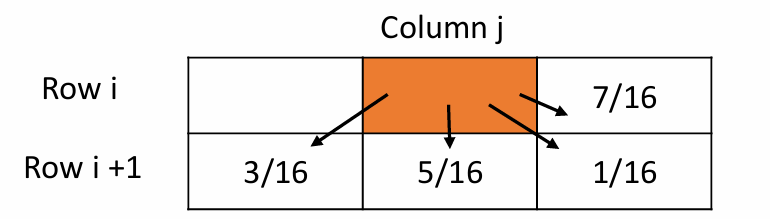
    - Right pixel: 7/16 of the error
    - Bottom-left pixel: 3/16 of the error
    - Bottom pixel: 5/16 of the error
    - Bottom-right pixel: 1/16 of the error
  - <span style="color:lightgreen"> Jarvis, Judice, and Ninke (JJN) Dithering </span>
    - Distributes the error across a larger neighborhood (12 pixels instead of Floyd-Steinberg’s 4).
    - Provides smoother gradients but can be more computationally intensive
  - <span style="color:lightgreen"> Ordered Dithering (Using a Dithering Matrix)</span>
    - Involves using a matrix (e.g., Bayer matrix) that repeats across the image.
    - Each pixel is compared against the value in the matrix, which determines if it should be black or white.
  - <span style="color:lightgreen"> Random Dithering (Stochastic Dithering)</span>
    - Each pixel is compared to a randomly generated threshold.
    - Fast and straightforward but can introduce noise.

  
```  
1. For each pixel in the image (left to right, top to bottom):
    a. Calculate the "old_pixel" value (current grayscale value of the pixel, between 0 and 255).
    b. Determine the "new_pixel" value by setting it to either black (0) or white (255):
       - If old_pixel >= 128, set new_pixel to 255 (white).
       - Otherwise, set new_pixel to 0 (black).
       
    c. Calculate the "quantization error":
       - error = old_pixel - new_pixel

    d. Diffuse the error to neighboring pixels that haven’t been processed yet:
       - Distribute the error to adjacent pixels using Floyd-Steinberg weights:
         - Pixel to the right: image[x + 1][y]   += error * 7/16
         - Pixel to the bottom-left: image[x - 1][y + 1] += error * 3/16
         - Pixel directly below: image[x][y + 1] += error * 5/16
         - Pixel to the bottom-right: image[x + 1][y + 1] += error * 1/16

2. Repeat for all pixels in the image.
```



<h1 style="color:salmon" id="3">Utility functions</h1>


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

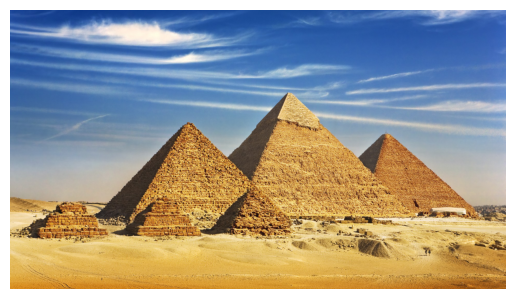

In [7]:
# reading the image
img_path = "../images/pyramid.jpg"
img = mpimg.imread(img_path)
# display
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# printing the image array 
print(f"Type of image data structure: {type(img)}")
print(f"Shape of the image: {img.shape}")
# to acces a specic pixel image[row,cols]
img[1,1]
# that mean the pixel in this coordinates consist of three values (R, G, B)

Type of image data structure: <class 'numpy.ndarray'>
Shape of the image: (1080, 1920, 3)


array([ 30,  68, 153], dtype=uint8)

In [25]:
img[..., :3].shape

(1080, 1920, 3)

In [44]:
img[:,:, :3].shape

(1080, 1920, 3)

## Luminosity Method (Weighted Average)
>This method converts an RGB image to grayscale by calculating a weighted sum of the R, G, and B channels. The weights are chosen based on the **perception that humans are more sensitive to <span style="color:green">green</span> and less sensitive to <span style="color:blue">blue</span>.** The typical weights used are:
> **- <span style="color:red"> R : 0.2989 </span>, <span style="color:green"> G : 0.5870 </span>, <span style="color:blue"> B : 0.1140</span>**

- R 30%, G 60%, B 10%
$$
\huge I = \red{R * 0.2989} + \green{G *  0.5870} + \blue{B * 0.1140} 
$$

- **Green has the highest weight **
- **Blue has the lowest weight**
  
## other methods to convert RGB image to gray scale 
| Method                  | Formula                                      | Description                                                                                           | Pros                           | Cons                                 |
|-------------------------|----------------------------------------------|-------------------------------------------------------------------------------------------------------|--------------------------------|--------------------------------------|
| **Luminosity Method**   | $0.2989 * R + 0.5870 * G + 0.1140 * B$       | Uses weighted average based on human perception of color brightness.                                  | More realistic grayscale       | Slightly more complex calculation    |
| **Average Method**      | $\large \frac{(R + G + B) }{3}$                            | Averages all three color channels equally.                                                            | Simple and fast                | Ignores color perception, less realistic |
| **Desaturation Method** | $\large \frac{(max(R, G, B) + min(R, G, B))} {2}$         | Averages the lightest and darkest colors in each pixel.                                               | Higher contrast                | Can lose detail                      |
| **Single Channel**      | `R` (or `G` or `B` channel)                  | Uses only one color channel as the grayscale intensity.                                               | Very simple and fast           | Ignores information from other channels |
| **ITU-R BT.601**        |$0.299 * R + 0.587 * G + 0.114 * B  $        | Similar to luminosity but defined by the ITU-R BT.601 standard, often used in video processing.       | High accuracy for video        | Slightly more complex calculation    |


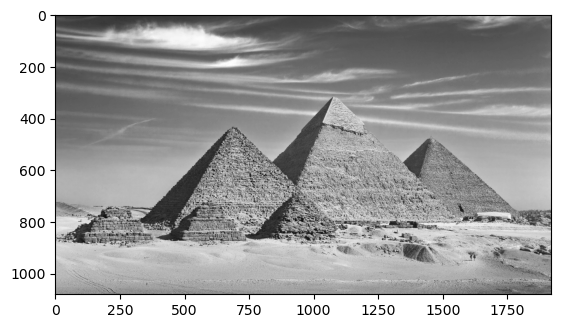

In [46]:
# function that turn the image to gray scale 
def RGB_to_gray(image):
    # we can use this but some images may have a fourth channel 
    # return np.dot(img, [0.2989, 0.5870, 0.1140])
    # but using img[..., :3] or img[:, :, :3] is taking care of this possibility 

    return np.dot(img[:, :, :3], [0.2989, 0.5870, 0.1140])
plt.imshow(RGB_to_gray(img), cmap='gray');

In [54]:
# saving the gray scale image to variable 
gimg = RGB_to_gray(img)
print("The gray-converted image shape :", gimg.shape)
print("The gray-converted Pixel min value :", gimg.min())
print("The gray-converted Pixel max value :", gimg.max())
print("The gray-converted Pixel average value :", gimg.mean())


The gray-converted image shape : (1080, 1920)
The gray-converted Pixel min value : 2.989
The gray-converted Pixel max value : 253.49249999999998
The gray-converted Pixel average value : 143.09316504123265


<h1 style="color:salmon" id="4">Simple Halftoning Algorithm</h1>


In [55]:
gimg

array([[ 65.3251,  65.3251,  65.3251, ..., 136.9067, 136.9067, 133.907 ],
       [ 66.325 ,  66.325 ,  66.325 , ..., 133.907 , 134.9069, 133.907 ],
       [ 66.325 ,  66.325 ,  66.325 , ..., 129.9074, 130.9073, 131.9072],
       ...,
       [171.1109, 141.1139, 148.8358, ..., 118.7044, 113.7049, 122.704 ],
       [168.1112, 132.1148, 144.8362, ...,  93.7069, 119.7043, 104.7058],
       [169.1111, 152.1236, 151.8355, ..., 101.9341, 106.7056, 102.706 ]])

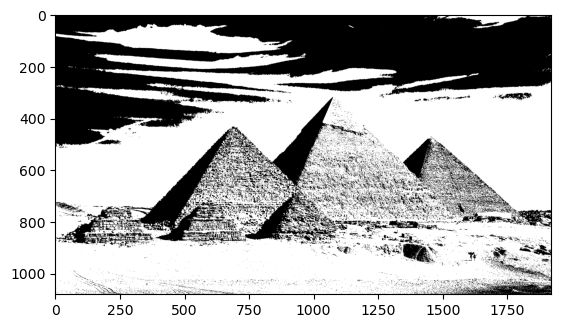

In [ ]:
# threshold 
t = 255//2
# Return an array of zeros with the same shape and type as a given array.
gimg_halftoned = np.zeros_like(gimg)
for ri, R in enumerate(gimg):
    for ci, C in enumerate(R):
        if C >= t:
            gimg_halftoned[ri, ci] = 255 # turn the pixel on 
        else:
            gimg_halftoned[ri, ci] = 0 # turn the pixel off 
plt.imshow(gimg_halftoned, cmap='gray');
 

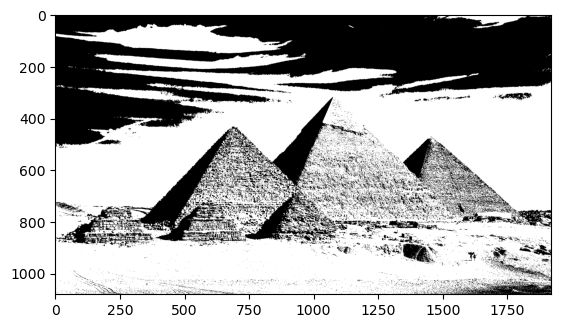

In [76]:
# making it a function 
def halftoning(img):
    if len(img.shape) > 2: 
        print("This image is not gray-scale image, execute the RGB_to_gray function on this image first")
        return 
    img_half = np.zeros_like(img)
    for ri, R in enumerate(img):
        for ci, C in enumerate(R):
            img_half[ri, ci] = 255 if C >= t else  0
    return img_half

plt.imshow(halftoning(gimg), cmap='gray');

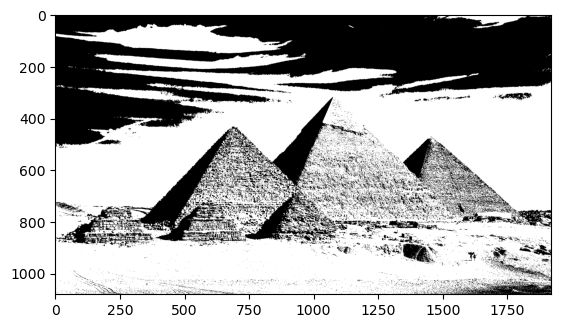

In [ ]:
# more elite implmentation 
# much faster implmentation by the way
def halftoning_elite(img, t=128):
    if len(img.shape) > 2 : return
    return np.where(img >= t, 255, 0)
plt.imshow(halftoning(gimg), cmap='gray');

<h1 style="color:salmon" id="5">Advanced Halftoning Algorithm</h1>


>Dither is an intentionally applied form of noise used to **randomize quantization error**, preventing large-scale patterns such as color banding in images. 
>Dither is routinely used in processing of both digital audio and video data, and is often one of the last stages of mastering audio to a CD.
https://en.wikipedia.org/wiki/Dither

>Quantization,
> - Is like simplifying complex data into easier-to-handle categories or numbers.
> - It involves turning continuous values into a smaller set of discrete values.

>When we convert real-world signals (like sound or images) into a digital format, we have to quantize them. 

>For example, a sound wave can have an infinite number of possible values, but when we digitize it, we only keep a limited number of those values. This is necessary because computers can only work with finite numbers.
- Rounding and Turncation is someforms of quantization
- Heights of people into categories 

>Error diffusion is a type of halftoning in which the quantization residual is distributed to neighboring pixels that have not yet been processed.

- Error diffusion classified as area operation 
  - because what the algorithm does at one location influences what happens at other locations. 
  - This mean buffering is required
  - It's complicated to use parallel processing 
  - Error diffusion has the tendency to **enhance edges in an image**
    - This can make text in images more readable
- Point operations, such as ordered dither, do not have these complications.
  
## Floyd–Steinberg dithering
- An image dithering algorithm (1976) 
- It's an Error diffusion method applied after halftoning 
- It use a simple kernel 
$$
\huge \frac{1}{16} 
\begin{pmatrix}
\_ & \# & 7 \\
3 & 5 & 1 
\end{pmatrix}
$$
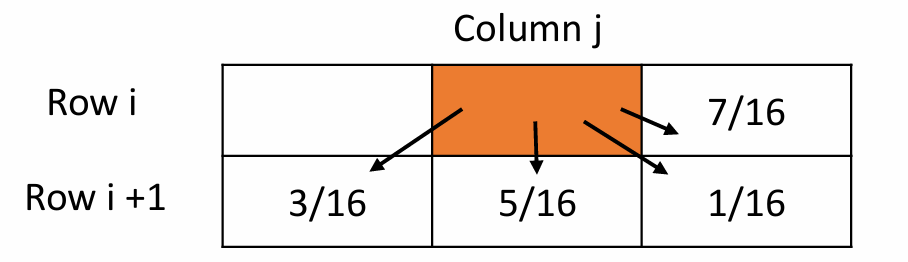

- if the original pixel values are exactly halfway in between the nearest available colors (gray for example is 50% white and black)
- the dithered result is a **checkerboard pattern**
  
  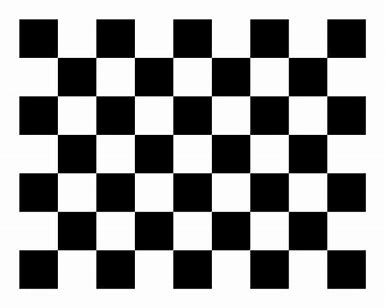
  
- For correct results, all values should be **linearized first** (we can test that)
- The weights (7/16, 5/16, 3/16, 1/16) are designed to ensure that most of the error is passed to the nearest pixels.
  - which are more likely to be visually influenced by the current pixel (assumption)
  - our eyes tend to read images from left to right (assumption)

<h2 style="color:skyblue" id="6">Floyed-Steinberg dithering</h2>


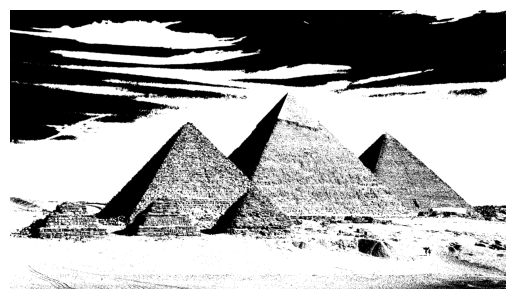

In [84]:
himg = halftoning_elite(gimg) 
plt.imshow(himg, cmap='gray')
plt.axis('off')
plt.show()

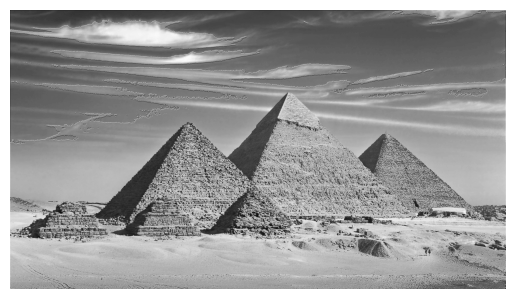

In [97]:
# original gray scale image -> gimg
# halftoned image -> himg 
# Error at given pixel is old_pixel_value - new_pixel_value 
err_diff_img = np.copy(himg)
Error = gimg - himg # vectorization
for ir, R in enumerate(himg):
    for ic, C in enumerate(R):
        # Error = old - new
        # I think we can can compute this better
        #  with numpy vectorization and just accessing the error from an array
        # err = gimg[ir, ic] - himg[ir, ic]
        err = Error[ir, ic]
        # let's propagate the error 
        bot_err, bot_lef_err, bot_rig_err, rig_err = ((1/16)*err)*np.array([5, 3, 1, 7])
        try:
            # right 
            err_diff_img[ir, ic+1] += rig_err
            # bottom 
            err_diff_img[ir+1, ic] += bot_err 
            err_diff_img[ir+1, ic+1] += bot_rig_err
            err_diff_img[ir+1, ic-1] += bot_lef_err
        except:
            continue
# Clip values to stay within valid range [0, 255]
err_diff_img = np.clip(err_diff_img, 0, 255)

plt.imshow(err_diff_img, cmap='gray')
plt.axis('off')
plt.show()

> the above is not the standard algorithm as we are not chainging the original image, we calculate the error based on the unchanged/unapdated image, but our changes should have effects on the comming pixels.

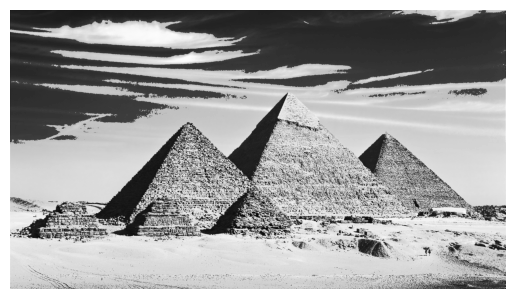

In [98]:
# original gray scale image -> gimg
# halftoned image -> himg 
# Error at given pixel is old_pixel_value - new_pixel_value 
err_diff_img = np.copy(himg)

for ir, R in enumerate(himg):
    for ic, C in enumerate(R):
        # Error = old - new
        # I think we can can compute this better
        #  with numpy vectorization and just accessing the error from an array
        #  THIS IS THE STANDARD WAY AS WE CACULATING-THE-ERROR-ON-THE-SAME-IMAGE-WE-WOULD-RETURN NOT ON UNCHANGED IMAGE
        err = gimg[ir, ic] - err_diff_img[ir, ic]
        # let's propagate the error 
        bot_err, bot_lef_err, bot_rig_err, rig_err = ((1/16)*err)*np.array([5, 3, 1, 7])
        try:
            # right 
            err_diff_img[ir, ic+1] += rig_err
            # bottom 
            err_diff_img[ir+1, ic] += bot_err 
            err_diff_img[ir+1, ic+1] += bot_rig_err
            err_diff_img[ir+1, ic-1] += bot_lef_err
        except:
            continue
# Clip values to stay within valid range [0, 255]
err_diff_img = np.clip(err_diff_img, 0, 255)

plt.imshow(err_diff_img, cmap='gray')
plt.axis('off')
plt.show()

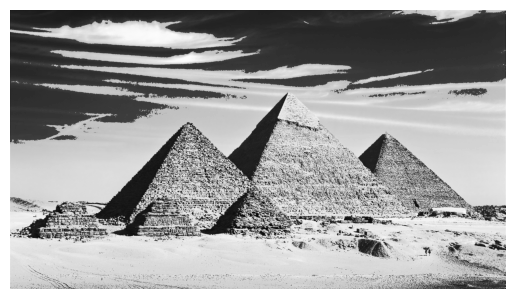

In [107]:
# let's optimize the code
# removing the try-catch 
# working with integers is faster (hmmm)
# we can't use (that much at least) vectorization as this is an area operation as we said, unless we change the algorithm like the first time.
err_diff_img = np.copy(himg)

for ir in range(err_diff_img.shape[0]) : #loop over rows
    for ic in range(err_diff_img.shape[1]) : #loop over columns 
        err = gimg[ir, ic] - err_diff_img[ir, ic]
        if ic+1 < err_diff_img.shape[1]:# check right column border
            # right 
            err_diff_img[ir, ic+1] += err*(7/16)
            if ir+1 < err_diff_img.shape[0]: #check bottom row border 
                # bottom 
                err_diff_img[ir+1, ic] += err*(5/16)
                # right bottom
                err_diff_img[ir+1, ic+1] += err*(1/16)
        
                if ic-1 >= 0: #check left border of image
                    # left bottom 
                    err_diff_img[ir+1, ic-1] += err*(3/16)
                    
err_diff_img = np.clip(err_diff_img, 0, 255)

plt.imshow(err_diff_img, cmap='gray')
plt.axis('off')
plt.show()

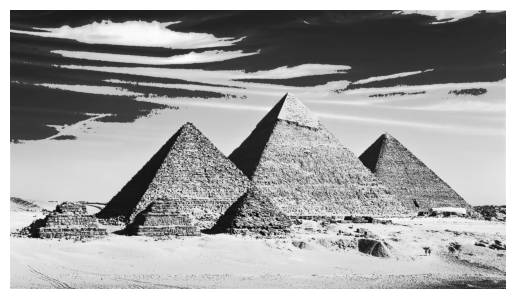

In [106]:
# optimized but more simple way is to just add padding 
err_diff_img = np.copy(himg)
# padding
err_diff_img_pad = np.pad(err_diff_img, pad_width=1, constant_values=0)
for ir in range(err_diff_img.shape[0]):
    for ic in range(err_diff_img.shape[1]):
        err = gimg[ir, ic] - err_diff_img_pad[ir, ic]
        err_diff_img_pad[ir, ic+1] += err*(7/16)
        err_diff_img_pad[ir+1, ic] += err*(5/16)
        err_diff_img_pad[ir+1, ic-1] += err*(3/16)
        err_diff_img_pad[ir+1, ic+1] += err*(1/16)

un_padded_img = err_diff_img_pad[1:-1, 1:-1]
un_padded_img = np.clip(un_padded_img, 0, 255)
plt.imshow(un_padded_img, cmap='gray')
plt.axis('off')
plt.show()

